In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Clean_Data.csv')

In [3]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

SVM Accuracy: 99.3355


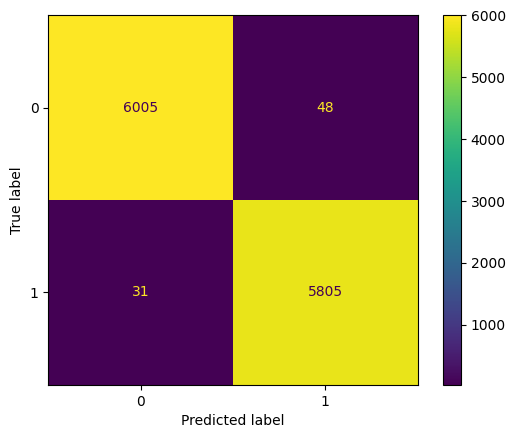

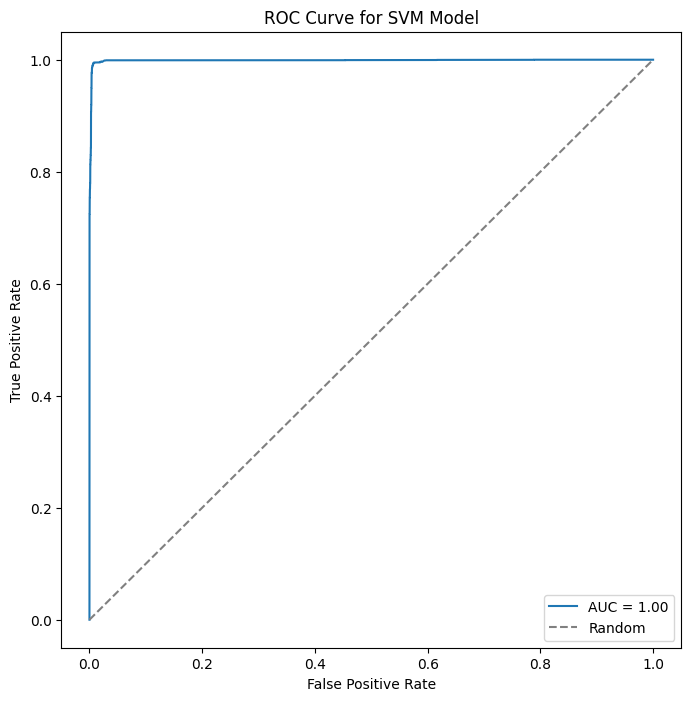

AUC Score for SVM Model: 0.9986


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

# Create an SVM classifier with probability estimates enabled
svm_classifier = SVC(probability=True, random_state=42)

# Training
svm_classifier.fit(X_train1, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test1)

# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)*100
print(f'SVM Accuracy: {accuracy_svm:.4f}')

# Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test1, y_test)
plt.show()

# ROC-AUC score
y_prob_svm = svm_classifier.predict_proba(X_test1)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_score_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, label=f'AUC = {auc_score_svm:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for SVM Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'AUC Score for SVM Model: {auc_score_svm:.4f}')


In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6053
           1       0.99      0.99      0.99      5836

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889

